In [1]:
#### 读取centier软件所确定的着丝粒区域 ####
library(dplyr)
Nip_cen_region_df <- read.csv("/public/home/cszx_huangxh/qiujie/collabrators/gulei/cen_analysis/cen_define_2.0/Nip/CentIER_final_results/Nip_genome.fa_centromere_range.txt",sep ="\t",header = FALSE)
Zpal_cen_region_df <- read.csv("/public/home/cszx_huangxh/qiujie/collabrators/gulei/cen_analysis/cen_define_2.0/Zpal/CentIER_final_results/Zpal_genome.fa_centromere_range.txt",sep ="\t",header = FALSE)
Nip_cen_region_df <- Nip_cen_region_df %>% mutate(Species='Nip') %>% select(Species,everything()) %>%
  mutate(V1=gsub("Chr([1-9])$","Chr0\\1",V1)) %>%
  rename(Chr=V1,CE_start=V2,CE_end=V3) 
Zpal_cen_region_df <- Zpal_cen_region_df %>% mutate(Species='Zpal') %>% select(Species,everything()) %>%
  mutate(V1=gsub("Chr([1-9])$","Chr0\\1",V1)) %>%
  rename(Chr=V1,CE_start=V2,CE_end=V3) 
combined_region_df <- bind_rows(Zpal_cen_region_df,Nip_cen_region_df)

#### 读取染色体长度csv文件 ####
Zpal_chr_length <- read.csv("/public/home/cszx_huangxh/qiujie/collabrators/gulei/genome_data/Zpal_chromosome_lengths.csv",sep = ",",header = FALSE)
Nip_chr_length <- read.csv("/public/home/cszx_huangxh/qiujie/collabrators/gulei/genome_data/Nip_chromosome_lengths.csv",sep = ",",header = FALSE)
colnames(Zpal_chr_length) <- c("Species","Chr","chr_length")
colnames(Nip_chr_length) <- c("Species","Chr","chr_length")
combined_chr_length <- bind_rows(Zpal_chr_length,Nip_chr_length)

## 合并 ##
combined_position_df <- merge(combined_chr_length,combined_region_df,by = c("Species", "Chr")) %>%
  mutate( CEN_length = CE_end- CE_start)
#combined_position_df 



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
##### 读取TRASH (-max.div 5 参数以获得最大分割单体 )得到的summary结果文件 ####
library(dplyr)

# 读取两个 CSV 文件
temp_repeats_df_Zpal <- read.csv("/public/home/cszx_huangxh/qiujie/collabrators/gulei/cen_analysis/CenTools/cen/Zpal/Zpal_HOR/all.repeats.from.Zpal_genome.fa.csv")
temp_repeats_df_Nip <- read.csv('/public/home/cszx_huangxh/qiujie/collabrators/gulei/cen_analysis/CenTools/cen/Nip/Nip_HOR/all.repeats.from.Nip_genome.fa.csv')


In [3]:
#repeats_df_Zpal
# 添加 Species 列并重新排序 
####TRASH 软件会涉及二次修正，所以在allrepats csv文件中表现为 识别到的class中 部分两行会有两个重复（上一行的start/end和下一行的start/end 相同或非常接近，需要去除前者，保留后者）####

repeats_df_Zpal <- temp_repeats_df_Zpal %>%
  mutate(Species = 'Zpal') %>%
  select(Species, everything()) %>%
  filter(!(abs(start - lead(start)) <= 5 & abs(end - lead(end)) <= 5)) %>% # 使用 lead 比较当前行和下一行，并保留相似行的后者
  rename(Chr=seq.name)
repeats_df_Nip <- temp_repeats_df_Nip %>%
  mutate(Species = 'Nip') %>%
  select(Species, everything()) %>%
  filter(!(abs(start - lead(start)) <= 5 & abs(end - lead(end)) <= 5)) %>% # 同样的逻辑应用到 Nip 数据框
  rename(Chr=seq.name)
# 查看结果
repeats_df_Zpal

Species,start,end,width,seq,strand,class,region.name,Chr,edit.distance,repetitiveness
<chr>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
Zpal,6,12,7,TAGGGTT,-,,Zpal_genome.fa_Chr01,Chr01,NA,NA
Zpal,13,19,7,TAGGGTT,-,,Zpal_genome.fa_Chr01,Chr01,NA,NA
Zpal,20,26,7,TAGGGTT,-,,Zpal_genome.fa_Chr01,Chr01,NA,NA
Zpal,27,33,7,TAGGGTT,-,,Zpal_genome.fa_Chr01,Chr01,NA,NA
Zpal,34,40,7,TAGGGTT,-,,Zpal_genome.fa_Chr01,Chr01,NA,NA
Zpal,41,47,7,TAGGGTT,-,,Zpal_genome.fa_Chr01,Chr01,NA,NA
Zpal,48,54,7,TAGGGTT,-,,Zpal_genome.fa_Chr01,Chr01,NA,NA
Zpal,55,61,7,TAGGGTT,-,,Zpal_genome.fa_Chr01,Chr01,NA,NA
Zpal,62,68,7,TAGGGTT,-,,Zpal_genome.fa_Chr01,Chr01,NA,NA


In [4]:
Cent_df_Nip <- repeats_df_Nip %>% filter(width >= 140 & width <=170 & edit.distance <= 50  ) # & edit.distance <= 50
Cent_CE_df_Nip <- merge(Cent_df_Nip,combined_position_df,by = c("Species","Chr")) %>%
  select(Species,Chr,start,end,width,chr_length,CE_start,CE_end,CEN_length,class,edit.distance,strand,everything())


Cent_df_Zpal <- repeats_df_Zpal %>% filter(width >= 135 & width <=155 & edit.distance <= 50 ) # & edit.distance <= 50
Cent_CE_df_Zpal <- merge(Cent_df_Zpal,combined_position_df,by = c("Species","Chr")) %>%
  select(Species,Chr,start,end,width,chr_length,CE_start,CE_end,class,edit.distance,strand,everything())


combined_Cent_CE_df <- bind_rows(Cent_CE_df_Nip,Cent_CE_df_Zpal)
# Cent_CE_df_Zpal 
# print(unique(Cent_CE_df_Zpal$width))

#combined_Cent_CE_df

In [5]:
library(dplyr)

# 创建新的数据框，用于记录每条染色体的边界
sat_boundaries <- combined_Cent_CE_df %>%
  group_by(Species, Chr) %>%                      # 按照物种和染色体分组
  summarize(
    sat_start = first(start),                     # 获取每组的第一行 start 值
    sat_end = last(end)                           # 获取每组的最后一行 end 值
  )

# 查看生成的边界数据框
sat_boundaries 
write.table(sat_boundaries,"combined_sat_boundaries.csv",sep="\t", row.names=FALSE, col.names=TRUE)

`summarise()` has grouped output by 'Species'. You can override using the
`.groups` argument.


Species,Chr,sat_start,sat_end
<chr>,<chr>,<dbl>,<dbl>
Nip,Chr01,16810099,17693491
Nip,Chr02,13637268,14214566
Nip,Chr03,20034001,20433883
Nip,Chr04,9955675,10073952
Nip,Chr05,12517022,12620980
Nip,Chr06,15612483,16337867
Nip,Chr07,12233653,12436238
Nip,Chr08,12995309,13063887
Nip,Chr09,6772062,7222488


In [6]:
#### 选择代表性单体 ####
combined_monomer_df <- combined_Cent_CE_df %>%
  group_by(Species,seq) %>%
  summarise(occurrence = n()) %>%
  ungroup() %>%
  arrange(desc(occurrence)) %>%
  mutate(seq_length = nchar(seq)) %>% 
  filter(occurrence>=30) 
Zpal_monomer_df <- combined_monomer_df %>%
  filter(Species=="Zpal") %>%
  ungroup() %>%
  mutate(ID = paste0("Zpal-T",row_number(),"-", seq_length))
Nip_monomer_df <- combined_monomer_df %>%
  filter(Species=="Nip") %>%
  ungroup() %>%
  mutate(ID = paste0("Nip-T",row_number(),"-", seq_length))


`summarise()` has grouped output by 'Species'. You can override using the
`.groups` argument.


In [ ]:
combined_monomer_df
print(unique(combined_monomer_df$seq_length))


In [ ]:
library(dplyr)
library(purrr)  

# 定义输出 FASTA 文件的函数
write_fasta <- function(df, output_file) {
  # 打开一个文件连接
  file_conn <- file(output_file, "w")
  
  # 对每一行数据，创建 FASTA 格式
  walk2(df$ID, df$seq, ~{
    writeLines(paste0(">", .x), file_conn)  # 写入 >ID
    writeLines(.y, file_conn)  # 写入序列
  })
  
  # 关闭文件连接
  close(file_conn)
}
combined_monomer_df <- bind_rows(Zpal_monomer_df,Nip_monomer_df)
# 将数据框写入到 fasta 文件
write_fasta(Zpal_monomer_df, "Zpal_monomer.fasta")
write_fasta(Nip_monomer_df, "Nip_monomer.fasta")
write_fasta(combined_monomer_df, "combined_monomer.fasta")


In [14]:
#### 读取超级家族分类txt ####
library(dplyr)
Zpal_SF <- read.delim("Zpal_Nip_subfamily.txt", sep = "\t", comment.char = "#", header = FALSE,skip=3) %>% filter(grepl("Zpal", V1)) 

Zpal_SF <- Zpal_SF %>%
  filter(V2 == "branch") 

# 获取 V3 列的唯一值
unique_values <- unique(Zpal_SF$V3)

# 为每个唯一值生成 SF 标签，例如 SF-A, SF-B, SF-C...
sf_map <- paste0("SF-", LETTERS[seq_along(unique_values)])
names(sf_map) <- unique_values

# 为数据框添加 SF 列，并映射 V3 列中的值到相应的 SF 标签
Zpal_SF <- Zpal_SF %>%
  mutate(SF = sf_map[V3])

# 过滤掉 V1 列中包含多个 Rank 的行（检测是否包含分隔符，比如 '|')
Zpal_SF <- Zpal_SF %>%
  filter(!grepl("\\|", V1)) %>%
  rename(ID=V1) %>%
  select(ID,SF)
Zpal_SF
write.table(Zpal_SF,"Zpal_monomer_sf.csv",sep = "\t", row.names = FALSE,col.names = TRUE)


ID,SF
<chr>,<chr>
Zpal-T397-146,SF-A
Zpal-T322-144,SF-A
Zpal-T522-144,SF-A
Zpal-T475-144,SF-A
Zpal-T387-144,SF-A
Zpal-T476-144,SF-A
Zpal-T36-143,SF-A
Zpal-T363-143,SF-A
Zpal-T80-144,SF-A


In [21]:
library(dplyr)
Zpal_combined_monomer_df <- combined_monomer_df %>% filter(Species=="Zpal")

# 基于 'ID' 列，将 Zpal_SF 映射到 Zpal_monomer_df
Zpal_known_SF_df <- left_join(Zpal_monomer_df, Zpal_SF, by = c("ID"))

# 查看合并后的结果
Zpal_known_SF_df


Species,seq,occurrence,seq_length,ID,SF
<chr>,<chr>,<int>,<int>,<chr>,<chr>
Zpal,AATGATTGGGCATGTTAATAAACCTTTTTGTTATGGAAGCAAACTTTTGAATCTTGCACATTACGTGTGGCGAAGTTTTCACAACATTCTTGTCGAAACTGAAACCCAAGAAACACCTCCTTCGGTACTAATACACCATATTAG,455,144,Zpal-T1-144,SF-F
Zpal,GATGCTTGGGCATGTTAATGAAAACCTTTTTGTTCTAGAAGTGAACTTTTGATTCTTGCTCATTAAGAGTGGCAATGTTTTTGCAACATTTGTGTCCCGAATGGAAACTCGAGAAACACCTCCTTCGGTACTATTCCACCATATTTG,375,147,Zpal-T2-147,SF-J
Zpal,AATGATTGGGCATGATAATAAACCTTTTTGTTCTGGATGCGAACTTTTGATTCTTTCAAATTATGGGTGGCGACGATTTCACTACATTCGTGTCAAGAATGGAAACCCAAGAACACCTCATTCGGTACTAATACACCATATTAG,322,144,Zpal-T3-144,SF-E
Zpal,AATGATTGGGCATGTTAATGAACCTTTTTGTTCTGGAAGTGAACTTTTGATTCTTGCGCATTATGGGTTGCGACGTATTCACAACATTCGTGTCCGGAATGGAAACCCAAGAAACACCTCCTTCGGTACTATTACACCATATTAG,303,145,Zpal-T4-145,SF-D
Zpal,GATGCTTGGGCATGTTAATGAAAACCTTTTTGTTCCGGAAGCGAACTTTTGATTCTTGCATATTATTAGTGGTGCTGTTTTTGCAACATCCGTGTATCGAATGGAAACTCGAGAAACACCTCCTTCGGTACTATTCCACCATATTTG,303,147,Zpal-T5-147,SF-J
Zpal,GATGCTTGGGCATGTTAATGAACCTTTTTGTTACGGAAGCGAACTTTTGATTCTTGCATATTACGAGTGGTGACGTTTTTGCAACATTTGTGTCCCGAATGGAAACTCGAGAAACACCTCCTTCGGTACTATTCCACCATATTTG,294,145,Zpal-T6-145,SF-J
Zpal,GATGCTTGGGCATGTTAATGAAAACCTTTTTGTTCCGGAAGCGCACCTTTGATTCTTGCATATTATGAGTGGTGATATTTTTGCAACATTCGTGTCTCGAATGGAAACTCGAGAAACACCTCCTTCGGTACTATTCCACCATATTTG,279,147,Zpal-T7-147,SF-J
Zpal,AATCAGTGGGCATGTTAATGAACCTTTTTGTTCCAGAAGCGAACTTTTGATTCTGTCACATTACGTGTGGCGAAGTTTTCAAAACATTCTTATCGGAACTGAAACCCAAGAAACATCTCTTTCGGTACTATTACACCATATTAG,258,144,Zpal-T8-144,SF-F
Zpal,GATGCTTGGGCATGTTAATGAAAACCTTTTTGTTCCGGAAGCGAACTTTTGATTCTTGCATATTATGAGTGGTGATATTTTTGCAACATTCGTGTCTCGAATGGAAACTCGAGAAACACCTCCTTCGGTACTATTCCACCATATTTG,257,147,Zpal-T9-147,SF-J


In [22]:
unalign_monomer_df <- combined_Cent_CE_df %>%
  group_by(Species,seq) %>%
  summarise(occurrence = n()) %>%
  ungroup() %>%
  arrange(desc(occurrence)) %>%
  mutate(seq_length = nchar(seq)) %>% 
  filter(occurrence < 30)
Zpal_unalign_monomer_df <- unalign_monomer_df %>%
  filter(Species=="Zpal")

`summarise()` has grouped output by 'Species'. You can override using the
`.groups` argument.


In [23]:
# 加载所需包
library(stringdist)
library(dplyr)
library(parallel)

# 定义分配子家族的函数
assign_subfamily <- function(remaining_seq, known_subfamily_df) {
  # 计算编辑距离
  dist_matrix <- stringdistmatrix(remaining_seq, known_subfamily_df$seq, method = "lv")
  # 找到最小编辑距离的索引
  closest_subfamily_idx <- which.min(dist_matrix)
  # 返回最近子家族的名称
  return(known_subfamily_df$SF[closest_subfamily_idx])
}

# 获取核心数并创建并行集群
numCores <- 24
cl <- makeCluster(numCores)
clusterExport(cl, c("assign_subfamily", "Zpal_known_SF_df", "stringdistmatrix", "which.min"))

# 并行处理每个序列的子家族分配
Zpal_aligned_monomer_df <- Zpal_unalign_monomer_df %>%
  mutate(Assigned_SubFamily = parSapply(cl, seq, assign_subfamily, known_subfamily_df = Zpal_known_SF_df))

# 停止并行集群
stopCluster(cl)


In [24]:
Zpal_aligned_monomer_df2 <- Zpal_aligned_monomer_df %>%
  rename(SF=Assigned_SubFamily)
Zpal_final_monomer_SF_df <- full_join(Zpal_known_SF_df,Zpal_aligned_monomer_df2,by=c("Species","seq","occurrence","SF","seq_length"))

In [25]:
Cent_CE_df_SF_Zpal <- Cent_CE_df_Zpal %>%
  left_join(Zpal_final_monomer_SF_df %>% select(seq, SF), by = "seq") %>% select(Species,Chr,start,end,width,chr_length,CE_start,CE_end,CEN_length,SF,edit.distance,strand,region.name,repetitiveness,everything())
write.csv(Cent_CE_df_SF_Zpal,"Zpal_CEN_SubFamily.csv",row.names=FALSE)

Cent_CE_df_SF_Zpal


  

Species,Chr,start,end,width,chr_length,CE_start,CE_end,CEN_length,SF,edit.distance,strand,region.name,repetitiveness,class,seq
<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>
Zpal,Chr01,47116308,47116453,146,109217070,49200001,51200000,1999999,SF-A,31,+,Zpal_genome.fa_Chr01,453,CEN144,GATAATTGGGCACATTTTTGAACTTTTTTGTTCCAGAAGCGAACTTTTTGATTCTTGTATGTTACAGTTGTCGTCTATGTCACCACATTCATGTCCGAAACAGAAACATTAGAAACACATCCTTTGTTACTATTACACCATATTAG
Zpal,Chr01,47116454,47116596,143,109217070,49200001,51200000,1999999,SF-A,36,+,Zpal_genome.fa_Chr01,1055,CEN144,GATTACTAGGCACGATTTTAACCTTTTGTTCAAGAAGCGAAGTTTTCATTCTTGCAAGTTATGGGTGTCGTCTATTTTGCAAACTTTGTGTACGGATCGGAAATGCTAGAAACACTCACTTGGTACTTTTACACCATATTACG
Zpal,Chr01,47116597,47116740,144,109217070,49200001,51200000,1999999,SF-A,29,+,Zpal_genome.fa_Chr01,1223,CEN144,GTTATTTGGCACATTTTTGAACTTTTTTGTTCCGGATGCGAACTTTTGATTCTTGCATGTTATTGGTGCCGTCTATTTCACAACATTCGTGTTCGGAACGGAAACATTAGAAACACATACTTTGTTACTATTATACCATATTAG
Zpal,Chr01,47116741,47116884,144,109217070,49200001,51200000,1999999,SF-A,41,+,Zpal_genome.fa_Chr01,1140,CEN144,GATGATTGGACATGTTTATGATCCTTTTCATTCGAGAAGCGAAGTTTTAATCTTGCAAGTTAGGGCTGCTGTTTATTTCGCAAACTCTGTGTAAGGATCGAAAATTCTATAAACACTAACTTGCTACTTCTACACGATATTACG
Zpal,Chr01,47116885,47117029,145,109217070,49200001,51200000,1999999,SF-A,32,+,Zpal_genome.fa_Chr01,754,CEN144,GTTATTTGGCACATTTTTGAACGTTTTTGTTCCGGGAGCAAACTTTTGATTCTTGCATGTTACGGGTGCCATCTATTTCACAACCATCGCTTTCCGGAACGGAAACGTTAGAAACACATCCTTTGTTATTATTACACCATATTAC
Zpal,Chr01,47117030,47117173,144,109217070,49200001,51200000,1999999,SF-A,31,+,Zpal_genome.fa_Chr01,857,CEN144,GCTGATTGGACATGTTTATGAACCTTTTTGTTCTGGAAGCGAAGTTTTACTCTTTCAAGTTATGGGTGTCGTCTATTTCGCAAACTTTGTGTATGGAATGGAAATGCTAGAAACACATCAGTTGGTAGTATTACACCATATTTC
Zpal,Chr01,47117410,47117553,144,109217070,49200001,51200000,1999999,SF-A,28,+,Zpal_genome.fa_Chr01,1192,CEN144,GTTTATTTGTCACATTTTGAACTTTTTTGTTTCGGAAGCGAACTTTTGATTCTTGCATGTTACGGGTGTCGTCTATTTCACAACATTCGTGTACAGAACGAAAACGTTAGAAACACAACCTTTGTTACTATTACACCATATTAG
Zpal,Chr01,47117554,47117697,144,109217070,49200001,51200000,1999999,SF-A,33,+,Zpal_genome.fa_Chr01,1134,CEN144,GATGATTGGACATGTTTATGAACATTTTTGTTCCAGAAGCGAAGTTTTAATCTTATGAGTTACTGGTGTCGTCTATTTCGCAAACTTTCTGTACAGAACGGAAATGCTTGAAACACTCACTTGGTACTTCTACACCATATTACG
Zpal,Chr01,47117698,47117840,143,109217070,49200001,51200000,1999999,SF-A,33,+,Zpal_genome.fa_Chr01,403,CEN144,GTTATCTGGCACATTTTTGAACTTTTTTTTTCGAAAGCGAACTTTTGATTCTTGCATGTTATGGATGTCGTCTATTTCGCTACATTCGTGTCCGGAACGGAAACGATAGAAACACATCTTTTGTTACTATTACTTCATATTAT


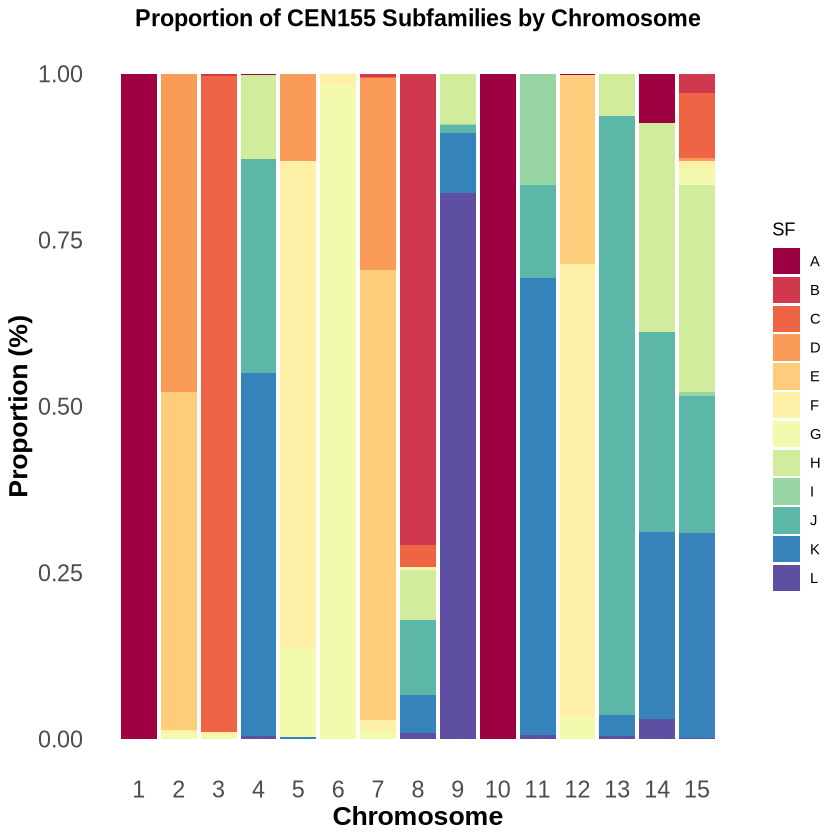

In [28]:
Cent_CE_df_SF_Zpal <- read.csv("Zpal_CEN_SubFamily.csv") %>% mutate(Chr= as.numeric(gsub("Chr","",Chr))) 
options(repr.plot.width = 7, repr.plot.height = 7)
# 按染色体和SF进行分组，并计算每个SF在每条染色体上的数量
SF_distribution <- Cent_CE_df_SF_Zpal %>%
  group_by(Chr, SF) %>%
  summarise(count = n(),.groups = "drop") %>%
  ungroup()

# 计算每条染色体上每个子家族（SF）的比例
SF_distribution <- SF_distribution %>%
  group_by(Chr) %>%
  mutate(total = sum(count),
         proportion = count / total * 100) %>%
  ungroup()

library(ggplot2)
library(RColorBrewer)

# Get Nature-inspired colors from RColorBrewer (Set3 is a common choice for publications)
n_colors <- length(unique(SF_distribution$SF))  # Number of unique SF values
color_palette <- colorRampPalette(brewer.pal(11, "Spectral"))(n_colors)  # Extend Set3 to fit your SF categories

library(dplyr)

# 确保 Chr 列是数字
SF_distribution <- SF_distribution %>%
  mutate(Chr = as.numeric(Chr))  # 将 Chr 列转换为数值类型

# 绘图
p<-ggplot(SF_distribution, aes(x = Chr, y = proportion, fill = SF)) +
  geom_bar(stat = "identity", position = "fill") +
  scale_fill_manual(values = color_palette, 
                    labels = function(x) gsub("SF-", "", x)) +  # 去掉 "SF-" 前缀
  theme_minimal() +
  labs(title = "Proportion of CEN155 Subfamilies by Chromosome", 
       x = "Chromosome", y = "Proportion (%)") +
  theme(
    axis.title.x = element_text(size = 16, face = "bold"),  # 调整横坐标标签字体大小和加粗
    axis.title.y = element_text(size = 16, face = "bold"),  # 调整纵坐标标签字体大小和加粗
    axis.text.x = element_text(size = 14),  # 调整横坐标刻度值的字体大小
    axis.text.y = element_text(size = 14),  # 调整纵坐标刻度值的字体大小
    plot.title = element_text(hjust = 0.5, size = 14, face = "bold"),  # 调整标题大小和加粗
    panel.grid = element_blank()  # 去掉所有网格线
  ) +
  scale_x_continuous(breaks = 1:15)  # 确保横坐标显示1到15
p
ggsave("./plots/subfamily.svg", plot = p, width = 7, height = 7, units = "in", device = "svg")

In [35]:
# 查看生成的颜色
print(color_palette)

 [1] "#9E0142" "#D0384D" "#EE6445" "#FA9C58" "#FDCD7B" "#FEF0A7" "#F3FAAD"
 [8] "#D0EC9C" "#98D5A4" "#5CB7A9" "#3682BA" "#5E4FA2"


In [68]:
#### 将十六进制转换成HSL格式，替换原color文件中的rgb为，保持进化树与上图颜色统一 ####

# 将十六进制颜色转换为RGB
rgb_values <- col2rgb(color_palette)

# 查看结果
print(rgb_values)
# 将 rgb_values 转换为 "R,G,B" 格式的字符串
rgb_strings <- apply(rgb_values, 2, function(x) paste(x, collapse = ", "))
rgb_strings

# 读取原始文本文件
lines <- readLines("Zpal_Nip_subfamily.txt")


Zpal_lines <- lines[grepl("Zpal", lines) & grepl("branch", lines) & !grepl("\\|",lines) ]
unique_rgbs <- unique(gsub(".*rgb\\(([0-9]+, [0-9]+, [0-9]+)\\).*", "\\1", grep("rgb", Zpal_lines, value = TRUE)))

# 确保 RGB 数量和 rgb_values 数量匹配
if (length(unique_rgbs) != length(rgb_strings)) {
  stop("Error: unique RGB 值的数量和 rgb_values 不匹配！")
}

# 创建替换映射表
rgb_replacement_map <- setNames(rgb_strings, unique_rgbs)

# 创建一个新的列表来存储修改后的行
new_lines <- c()

# 遍历每一行，查找需要替换的行
for (line in lines) {
  # 检查行是否包含 'rgb(...)'
  if (grepl("rgb\\([0-9]+, [0-9]+, [0-9]+\\)", line)) {
    # 提取当前行的 RGB 值
    current_rgb <- gsub(".*rgb\\(([0-9]+, [0-9]+, [0-9]+)\\).*", "\\1", line)
    
    # 根据替换表，替换当前 RGB 为新 RGB
    if (current_rgb %in% names(rgb_replacement_map)) {
      new_line <- gsub(current_rgb, rgb_replacement_map[[current_rgb]], line)
    } else {
      new_line <- line
    }
  } else {
    # 如果行不包含 RGB，保持不变
    new_line <- line
  }
  
  # 添加到新行中
  new_lines <- c(new_lines, new_line)
}

# 将修改后的行写回到一个新的文件中
writeLines(new_lines, "Zpal_Nip_subfamily_modified.txt")

# 打印信息
cat("替换完成，已将结果保存到 Zpal_Nip_subfamily_modified.txt 文件中。\n")

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12]
red    158  208  238  250  253  254  243  208  152    92    54    94
green    1   56  100  156  205  240  250  236  213   183   130    79
blue    66   77   69   88  123  167  173  156  164   169   186   162


[1] "158, 1, 66"    "208, 56, 77"   "238, 100, 69"  "250, 156, 88" 
 [5] "253, 205, 123" "254, 240, 167" "243, 250, 173" "208, 236, 156"
 [9] "152, 213, 164" "92, 183, 169"  "54, 130, 186"  "94, 79, 162"

替换完成，已将结果保存到 Zpal_Nip_subfamily_modified.txt 文件中。


In [69]:
Cent_CE_df_SF_Zpal
sf_summary <- Cent_CE_df_SF_Zpal %>%
  group_by(SF) %>%
  summarise(
    count=n(),
    proportion = n() / nrow(Cent_CE_df_SF_Zpal) * 100
  )
sf_summary

Species,Chr,start,end,width,chr_length,CE_start,CE_end,CEN_length,SF,edit.distance,strand,region.name,repetitiveness,class,seq
<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>
Zpal,1,47116308,47116453,146,109217070,49200001,51200000,1999999,SF-A,31,+,Zpal_genome.fa_Chr01,453,CEN144,GATAATTGGGCACATTTTTGAACTTTTTTGTTCCAGAAGCGAACTTTTTGATTCTTGTATGTTACAGTTGTCGTCTATGTCACCACATTCATGTCCGAAACAGAAACATTAGAAACACATCCTTTGTTACTATTACACCATATTAG
Zpal,1,47116454,47116596,143,109217070,49200001,51200000,1999999,SF-A,36,+,Zpal_genome.fa_Chr01,1055,CEN144,GATTACTAGGCACGATTTTAACCTTTTGTTCAAGAAGCGAAGTTTTCATTCTTGCAAGTTATGGGTGTCGTCTATTTTGCAAACTTTGTGTACGGATCGGAAATGCTAGAAACACTCACTTGGTACTTTTACACCATATTACG
Zpal,1,47116597,47116740,144,109217070,49200001,51200000,1999999,SF-A,29,+,Zpal_genome.fa_Chr01,1223,CEN144,GTTATTTGGCACATTTTTGAACTTTTTTGTTCCGGATGCGAACTTTTGATTCTTGCATGTTATTGGTGCCGTCTATTTCACAACATTCGTGTTCGGAACGGAAACATTAGAAACACATACTTTGTTACTATTATACCATATTAG
Zpal,1,47116741,47116884,144,109217070,49200001,51200000,1999999,SF-A,41,+,Zpal_genome.fa_Chr01,1140,CEN144,GATGATTGGACATGTTTATGATCCTTTTCATTCGAGAAGCGAAGTTTTAATCTTGCAAGTTAGGGCTGCTGTTTATTTCGCAAACTCTGTGTAAGGATCGAAAATTCTATAAACACTAACTTGCTACTTCTACACGATATTACG
Zpal,1,47116885,47117029,145,109217070,49200001,51200000,1999999,SF-A,32,+,Zpal_genome.fa_Chr01,754,CEN144,GTTATTTGGCACATTTTTGAACGTTTTTGTTCCGGGAGCAAACTTTTGATTCTTGCATGTTACGGGTGCCATCTATTTCACAACCATCGCTTTCCGGAACGGAAACGTTAGAAACACATCCTTTGTTATTATTACACCATATTAC
Zpal,1,47117030,47117173,144,109217070,49200001,51200000,1999999,SF-A,31,+,Zpal_genome.fa_Chr01,857,CEN144,GCTGATTGGACATGTTTATGAACCTTTTTGTTCTGGAAGCGAAGTTTTACTCTTTCAAGTTATGGGTGTCGTCTATTTCGCAAACTTTGTGTATGGAATGGAAATGCTAGAAACACATCAGTTGGTAGTATTACACCATATTTC
Zpal,1,47117410,47117553,144,109217070,49200001,51200000,1999999,SF-A,28,+,Zpal_genome.fa_Chr01,1192,CEN144,GTTTATTTGTCACATTTTGAACTTTTTTGTTTCGGAAGCGAACTTTTGATTCTTGCATGTTACGGGTGTCGTCTATTTCACAACATTCGTGTACAGAACGAAAACGTTAGAAACACAACCTTTGTTACTATTACACCATATTAG
Zpal,1,47117554,47117697,144,109217070,49200001,51200000,1999999,SF-A,33,+,Zpal_genome.fa_Chr01,1134,CEN144,GATGATTGGACATGTTTATGAACATTTTTGTTCCAGAAGCGAAGTTTTAATCTTATGAGTTACTGGTGTCGTCTATTTCGCAAACTTTCTGTACAGAACGGAAATGCTTGAAACACTCACTTGGTACTTCTACACCATATTACG
Zpal,1,47117698,47117840,143,109217070,49200001,51200000,1999999,SF-A,33,+,Zpal_genome.fa_Chr01,403,CEN144,GTTATCTGGCACATTTTTGAACTTTTTTTTTCGAAAGCGAACTTTTGATTCTTGCATGTTATGGATGTCGTCTATTTCGCTACATTCGTGTCCGGAACGGAAACGATAGAAACACATCTTTTGTTACTATTACTTCATATTAT


SF,count,proportion
<chr>,<int>,<dbl>
SF-A,40948,11.5651734
SF-B,17482,4.9375394
SF-C,22027,6.2212092
SF-D,15229,4.3012119
SF-E,27142,7.6658674
SF-F,42675,12.0529397
SF-G,30935,8.7371456
SF-H,25907,7.3170594
SF-I,3383,0.9554797


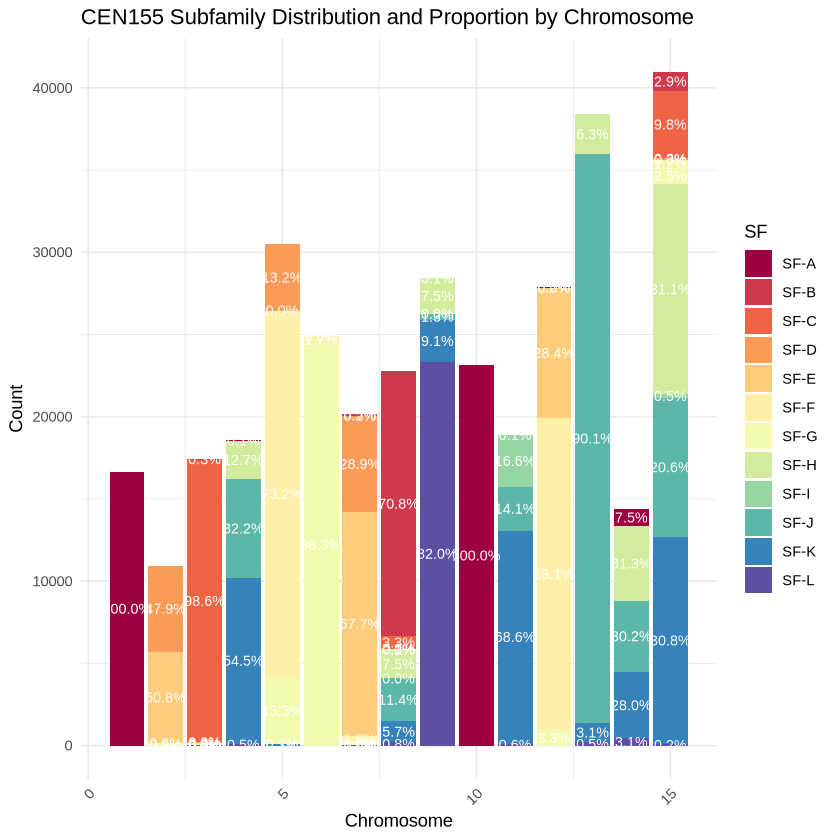

In [70]:
library(ggplot2)

# 绘制每条染色体上各子家族的数量和比例
ggplot(SF_distribution, aes(x = Chr, y = count, fill = SF)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = sprintf("%.1f%%", proportion)), 
            position = position_stack(vjust = 0.5), 
            size = 3, color = "white") +  # 在条形上显示百分比
    scale_fill_manual(values = color_palette) +  # Use the custom palette

  theme_minimal() +
  labs(title = "CEN155 Subfamily Distribution and Proportion by Chromosome", 
       x = "Chromosome", y = "Count") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))